<h3>Selecting the Best Models</h3>

<h5>K-Fold Cross Validation</h5>

<p>Prediction without Cross Validation</p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
wine_data = pd.read_csv('./datasets/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
x = wine_data.drop(['quality'], axis=1)

y= wine_data['quality']

In [5]:
# Dividing the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Feature scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
# Importing the random forest algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

# Training the model
regressor = rf_reg.fit(x_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(x_test)

# Evaluating the model performance
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.435275
Mean Squared Error: 0.362102275
Root Mean Squared Error: 0.6017493456581403


<p>Prediction with Cross Validation</p>

In [8]:
import pandas as pd

wine_data = pd.read_csv('./datasets/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
x = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

In [10]:
# Feature scaling using the standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
# Importing the random forest algorithm from SKLearn
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)

In [12]:
# Importing the cross validation model from sklearn
from sklearn.model_selection import cross_val_score

# Applying cross validation with 5 folds
scores = cross_val_score(rf_reg, x, y, cv=5, scoring='neg_mean_squared_error')

print(scores)

[-0.3816875  -0.46539185 -0.47984326 -0.4922884  -0.48489028]


In [14]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.46 accuracy with a standard deviation of 0.04


<h5>Hyperparameter Selection</h5>

In [9]:
import numpy as np
import pandas as pd

In [10]:
# Importing the dataset
wine_data = pd.read_csv('./datasets/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
x = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

In [12]:
# Defining a list of hyperparameters to be tested
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False],
    'criterion': ['mae']
}

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

In [14]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(
    estimator=rf_reg,
    param_grid=grid_param,
    scoring = 'neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
)

In [15]:
# Training with grid search
gd_sr.fit(x, y)

ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'poisson', 'absolute_error', 'friedman_mse'}. Got 'mae' instead.

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'squared_error', 'absolute_error', 'poisson'}. Got 'mae' instead.

--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'poisson', 'absolute_error', 'friedman_mse', 'squared_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'friedman_mse', 'poisson', 'squared_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_refresher\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}. Got 'mae' instead.


<h5>Model Evaluation via Validation Curves</h5>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [2]:
banknote_data = pd.read_csv('./datasets/banknote.csv')
banknote_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
x = banknote_data.drop(['class'], axis=1)
y = banknote_data['class']

In [4]:
train_size, train_scores, test_scores = learning_curve(RandomForestClassifier(), x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1, 100), verbose=1)

[learning_curve] Training set sizes: [  10   21   32   43   54   65   76   87   98  109  120  131  142  153
  164  175  186  197  208  219  230  241  252  263  274  285  296  307
  318  329  340  351  362  372  383  394  405  416  427  438  449  460
  471  482  493  504  515  526  537  548  559  570  581  592  603  614
  625  636  647  658  669  680  691  702  713  724  734  745  756  767
  778  789  800  811  822  833  844  855  866  877  888  899  910  921
  932  943  954  965  976  987  998 1009 1020 1031 1042 1053 1064 1075
 1086 1097]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   54.5s finished


In [5]:
# Finding the mean training scores
train_mean = np.mean(train_scores, axis = 1,)
print(train_mean)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [6]:
# Finding the mean testing scores
test_mean = np.mean(test_scores, axis=1)
print(test_mean)

[0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.61953285 0.78062906 0.87756337 0.92784074 0.96793364
 0.97011546 0.96865561 0.96501393 0.97157266 0.97375979 0.97521433
 0.97448706 0.97885601 0.98032117 0.99126211 0.99198938 0.98907498
 0.99126211 0.98980491 0.99198673 0.992714   0.99344393 0.99271931
 0.9912568  0.99344393 0.99417386 0.99271666 0.99344658 0.99198407
 0.99271931 0.9912568  0.99198407 0.99344393 0.99343862 0.9912

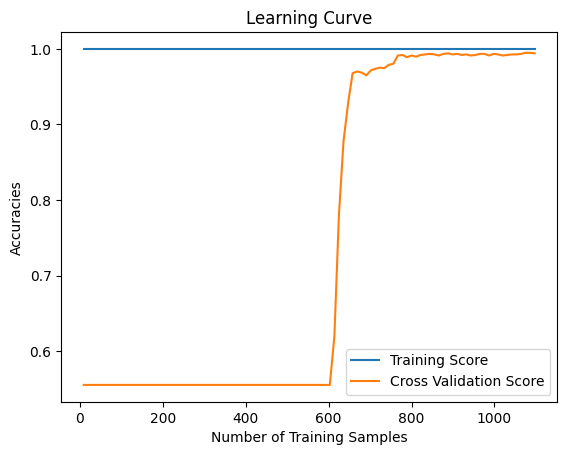

In [7]:
# Plotting the learning curves
plt.plot(train_size, train_mean, label='Training Score')
plt.plot(train_size, test_mean, label='Cross Validation Score')
plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracies')
plt.legend(loc='best')

<h5>Saving Models for Future Use</h5>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [2]:
banknote_data = pd.read_csv('./datasets/banknote.csv')
banknote_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
x = banknote_data.drop(['class'], axis=1)
y = banknote_data['class']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

In [7]:
classifier = rf_clf.fit(x_train, y_train)

In [9]:
import pickle

filename = './datasets/banknote_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [10]:
loaded_classifier = pickle.load(open(filename, 'rb'))
y_pred = loaded_classifier.predict(x_test)

In [14]:
# Evaluating the algorithm on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print("Classification Report: ",classification_report(y_test, y_pred))
print("Accuracy Score: ",accuracy_score(y_test, y_pred))

Confusion Matrix:  [[148   0]
 [  2 125]]
Classification Report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy Score:  0.9927272727272727
